# <font color=green size=10>CURSO DE ESTADÍSTICA - PARTE 3</font>

***

# <font color=green>1. DESCRIPCIÓN Y LECTURA DE LOS DATOS</font>
***

**Encuesta Nacional de Hogares -- 2015** 


La <b> Encuesta Nacional de Hogares (PNDA, del portugués Pesquisa Nacional por Amostra de Domicílios)</b> anualmente investiga, de forma permanente, las características generales de la población, educación, trabajo, ingresos y vivienda, y otras con frecuencia variable, de acuerdo con las necesidades de información del país, tales como las características de migración, fecundidad, nupcialidad, salud, seguridad alimentaria, entre otros temas. La recopilación de estas estadísticas constituye, durante los 49 años de realización de la investigación, **un importante instrumento para la formulación, validación y evaluación de políticas orientadas al desarrollo socioeconómico y a la mejora de las condiciones de vida en Brasil**.

## Fuente


https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?=&t=microdados


## Variables


> ### Renta 
> ***

Ingreso mensual del jefe del hogar.

> ### Edad
> ***

Edad (en años) del jefe del hogar.

> ### Altura (construida)
> ***

Altura (en metros) del jefe del hogar.

> ### UF (Unidad de federación)
> ***

|Código|Descripción|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descripción|
|---|---|
|0|Masculino|
|1|Femenino|

> ### Años de estudio
> ***

|Código|Descripción|
|---|---|
|1|Sin instrucción o menos de 1 año|
|2|1 año|
|3|2 años|
|4|3 años|
|5|4 años|
|6|5 años|
|7|6 años|
|8|7 años|
|9|8 años|
|10|9 años|
|11|10 años|
|12|11 años|
|13|12 años|
|14|13 años|
|15|14 años|
|16|15 años o más|
|17|No determinados| 
||No aplica|

> ### Color 
> ***

|Código|Descripción|
|---|---|
|0|Indigena|
|2|Blanca|
|4|Negra|
|6|Amarilla|
|8|Parda|
|9|Sin declaración|

<font color='red'>Observación</font>
***
> Se realizaron los siguientes tratamientos sobre los datos originales:
> 1. Se eliminaron los registros en los que la <b>Renta</b> no era válida (999 999 999 999);
> 2. Se eliminaron los registros en los que la <b>Renta</b> era missing;
> 3. Sólo se consideraron los registros de las  <b>personas de referencia</b> de cada hogar (responsables del hogar).

## Importando Bibliotecas y leyendo la base de datos

https://pandas.pydata.org/

In [ ]:
 import pandas as pd 
 import numpy as np

In [ ]:
datos = pd.read_csv('datos.csv')

In [ ]:
datos.head()

,UF,Sexo,Edad,Color,Anos de Estudio,Renta,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## Algunas preguntas que pueden ser de interés
> 1. ¿La variable altura se distribuye como una normal? 
> 2. ¿Los jefes del hogar tienen en promedio 1,70 cm de altura?
> 3. ¿Las mujeres ganan menos que los hombres?

# <font color=green>2. PRUEBA DE HIPÓTESIS</font>

***

Una prueba de hipótesis estadística es un procedimiento que permite decidir entre dos hipótesis opuestas: <b>Hipótesis nula</b> $(H_0)$  y la <b>Hipótesis alterna</b> $(H_1)$, las cuales conjeturan sobre alguna caraterística desconocida de la población de interés.

Para realizar este procedimiento se retira una muestra aleatoria de la población bajo estudio y con base en las evidencias de esa muestra se toma la decisión de rechazar o no rechazar $H_0$.<font color='red'> Note que la decisión es sobre $H_0$</font>! 


## **Entendiendo $H_0$ y $H_1$**
Considere que hay una persona que está siendo juzgada.




$H_0$:  La persona es **inocente**.

$H_1$: La persona es **culpable**.


## **Errores Inferenciales**

Un proceso inferencial siempre se encuentra sujeto a errores. 





 <b>Error Tipo I</b>: Rechazar $H_0$ siendo $H_0$ verdadera. 

> *Ejemplo: La persona es condenada a pesar de que realmente inocente*.



 <b>Error Tipo II</b>: No rechazar $H_0$ siendo $H_0$ falsa.

>*Ejemplo: La persona es absuelta a pesar de ser culpable*.


 

<b>Notación de los errores </b>

P(Error Tipo I) = $\alpha$  (<b>Nivel de significancia </b>)

P(Error Tipo II) = $\beta$, (siendo $1-\beta$ la <b>Potencia</b> )


El objetivo principal es proponer algún procedimiento de prueba de hipótesis que minimice los dos errores. Sin embargo, **en la práctica, solo se controla el error de tipo I** y generalmente su probabilidad es fijada en 0,05 o 0,01.

## **Criterio para decidir si se rechaza o no $H_0$**




<b>Región Crítica</b>: Valores de la **estadística de prueba** que conllevan al rechazo de $H_0$.

<b>$p$-valor</b>: Menor nivel de significancia con el cuál rechazamos $H_0$ siendo aplicado después que el experimento fue realizado. 
>- Si $p$-valor $\leq \alpha$ rechazamos $H_0$.

>- Si $p$-valor $> \alpha$ no rechazamos $H_0$.


## <font color=green>2.1 Prueba de normalidad </font>

***


¿La variable altura se distribuye como una normal?



**Es una prueba que nos permite determinar si un conjunto de datos proviene o no de una distribución normal.**

Hipótesis de interés

$H_0$:  La muestra proviene de una distribución normal.

$H_1$: La muestra no proviene de una distribución normal.

**Importando biblioteca**

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [ ]:
from scipy.stats import normaltest 

La función **normaltest** prueba la hipótesis nula $H_0$ de que la muestra proviene de una distribución normal.

<font color='red'>Rechazamos $H_0$ si el $p$-valor $\leq \alpha$.</font>


Fijando el nivel de significancia $(\alpha)$

In [ ]:
significancia = 0.05

### **Probando normalidad en la variable Renta**

**Inspección visual**

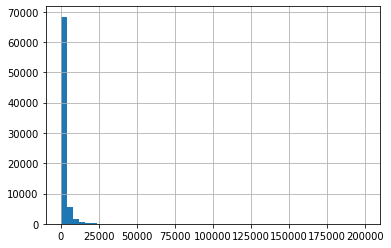

In [ ]:
datos.Renta.hist(bins=50)

**Establecemos las hipótesis**

$H_0$:  La muestra de la renta de los jefes del hogar proviene de una distribución normal.

$H_1$: La muestra de la renta de los jefes del hogar no proviene de una distribución normal.



In [ ]:
normaltest(datos.Renta)

NormaltestResult(statistic=152380.75803960307, pvalue=0.0)

In [ ]:
stats_test, p_valor = normaltest(datos.Renta)
print(stats_test)
print(p_valor)

152380.75803960307
0.0


<font color='red'> Rechazamos $H_0$ si el $p$-valor $\leq \alpha$ </font>

In [ ]:
p_valor <= significancia

True

Observe que <font color='red'>$p-\textrm{valor} \leq \alpha$</font>, por lo tanto tenemos suficiente evidencia en la muestra para <font color='red'>rechazar $H_0$</font>.

<font color='blue'>**Conclusión:** Con un nivel de significancia del 5% podemos concluir que la muestra de la renta de los jefes del hogar NO proviene de una distribución normal.</font>

### **Probando normalidad en la variable Altura**

**Inspección visual**

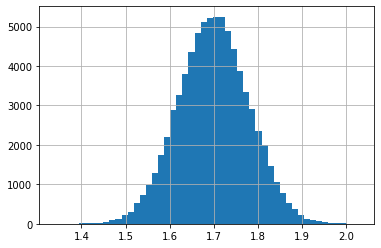

In [ ]:
datos.Altura.hist(bins=50)

**Establecemos las hipótesis**

$H_0$:  La muestra de la altura de los jefes del hogar proviene de una distribución normal.

$H_1$: La muestra de la altura de los jefes del hogar no proviene de una distribución normal.

In [ ]:
normaltest(datos.Altura)

NormaltestResult(statistic=0.19973093957002253, pvalue=0.9049591541967501)

In [ ]:
stats_test, p_valor = normaltest(datos.Altura)
print(stats_test)
print(p_valor)

0.19973093957002253
0.9049591541967501


<font color='red'> Rechazamos $H_0$ si el $p$-valor $\leq \alpha$ </font>

In [ ]:
p_valor <= significancia

False

Observe que <font color='red'>$p-\textrm{valor} > \alpha$</font>, por lo tanto NO tenemos suficiente evidencia en la muestra para rechazar $H_0$.

<font color='blue'>**Conclusión:** Con un nivel de significancia del 5% concluimos que la muestra de la altura de los jefes del hogar proviene de una distribución normal.</font>

## <font color=green>2.2 Pruebas de hipótesis para  parámetros </font>

***

¿Los jefes del hogar tienen una **altura promedio** de 1,70 cm?

**Observe que el parámetro de interés es la média $(\mu)$**

### **Conceptos importantes**

> <b>Estadística de prueba</b>: Es una estadística o variable aleatoria que se deriva del estimador puntual del parámetro de interés. En ella se comparan la hipótesis postulada y los datos observados. 

> <b> Región Crítica </b>: Los valores de la estadística de prueba que conllevan al rechazo de $H_0$.


### **Etapas básicas de una prueba**

**Paso 1: Establecer las hipótesis $H_0$ y $H_1$**;

 <font color='red'>Puntos importantes</font>
> 1. **La afirmación o declaración sobre el parámetro poblacional** $(\mu)$ y que en general es vinculada a un valor de referencia, o a una especificación estándar o histórica, debe ser formulada como **la hipótesis nula** $H_0$.
> 2. De manera general, la afirmación sobre el parámetro poblacional $(\mu)$ que **sospechamos que es verdadera**, debe ser formulada como **hipótesis alterna** $H_1$. 
> 3. Se pueden plantear las siguientes pruebas de hipótesis:

> - Prueba de hipótesis <font color='red'>bilateral</b></font>
$$
\begin{cases}
H_0: \mu = \mu_0   \\
H_1: \mu \neq  \mu_0
\end{cases}
$$

>- Prueba de hipótesis <font color='red'>unilateral a derecha</font>
$$
\begin{cases}
H_0: \mu \leq \mu_0   \\
H_1: \mu > \mu_0
\end{cases}
$$

> - Prueba de hipótesis <font color='red'>unilateral a izquierda</font>
$$
\begin{cases}
H_0: \mu \geq \mu_0   \\
H_1: \mu < \mu_0
\end{cases}
$$

> 4. En una prueba de hipótesis bilateral, la región de no rechazo corresponde a un intervalo de confianza para el parámetro de interés.

**Paso 2: Fijar el nivel de significancia $(\alpha)$ de la prueba**

<font color='red'>Puntos importantes</font>
> 1. El nivel de significancia $(\alpha)$ es el tamaño de la región de rechazo.
> 2. Los valores más frecuentes usados para $\alpha$ son $1\%$, $5\%$ y $10\%$
> 3. El complemento de la región de rechazo $(1-\alpha)$ corresponde al nivel de confianza.




![Nivel de Significancia](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Nivel_Significancia_mu.png)

**Paso 3: Determinar la distribución de muestreo y Estadística de Prueba adecuada**

<font color='red'>Puntos importantes</font>
> 1. Si la muestra aleatoria proviene de una **distribución normal con varianza conocida** $(\sigma^2)$, la estadística de prueba es
$$ Z = \frac{\overline{X} - \mu_0}{\sigma/\sqrt{n}}  \sim N(0,1),$$
siendo $\overline{X}$ la media muestra, $\mu_0$ un valor de referencia.
> 2. Si la muestra aleatoria proviene de una **distribución normal con varianza desconocida** $(\sigma^2)$, la estadística de prueba es
$$ T = \frac{\overline{X} - \mu_0}{S/\sqrt{n}}  \sim t(n-1),$$
donde $n-1$ son los grados de libertad de la distribución t-Student.
> 3. Si no sabemos de que distribución proviene la muestra, pero $n$ es suficientemente grande $(n\geq 30)$ podemos utilizar una de las estadística anteriores, conforme lo establece el teorema del límite central (TLC)
> 4. Si no sabemos de que distribución proviene la muestra y $n$ es pequeño $(n<30)$ debemos aumentar el tamaño de la muestra o usar pruebas no paramétricas. 






<font color ='red'> Resumen </font>

![Resumen una media](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Resumen_mu.png)

**Paso 4: Determinar la Región crítica.**

<font color='red'>Puntos importantes</font>
> 1. La localización de la región crítica depende de la forma de la hipótesis alterna $(H_1)$.
> 2. Si $H_1: \mu \neq \mu_0$, la región crítica se divide en las dos colas de la distribución de la estadística de prueba, o sea que una parte estará en la cola derecha y la otra en la cola izquierda.
> 3. Si $H_1: \mu > \mu_0$, la región crítica se encuentra en la cola derecha de la distribución de la estadística de prueba.  
> 4.  Si $H_1: \mu < \mu_0$, la región crítica se encuentra en la cola izquierda de la distribución de la estadística de prueba.



![Region Critica una media](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Region_Critica_mu.png)

**Paso 5: Tomar la Decisión y Concluir**

<font color='red'>Puntos importantes</font>

Podemos decidir si rechazamos o no $H_0$ usando dos criterios:
> 1. Si la Estadística de prueba $(Z \, \textrm{o}\, T)$  cae en la región de rechazo, entonces rechazamos $H_0$. 
> 2. Si $p$-valor $\leq \alpha$ rechazamos $H_0$. El cálculo del $p$-valor está ligado al tipo de hipótesis.  Asumiendo que $W$ es una estadística de prueba ($Z$ o $T$) cualquiera, tenemos que
>- Prueba <font color='red'>bilateral $(H_1: \mu \neq \mu_0)$</font>

$$p-\textrm{valor}= 2\times P(W \geq Z) = 2\times [1-P(W < Z) ] $$.

>- Prueba <font color='red'>Unilateral a derecha $(H_1: \mu > \mu_0)$</font>

$$p-\textrm{valor}= P(W \geq Z)= 1-P(W < Z)$$

>- Prueba <font color='red'>Unilateral a izquierda $(H_1: \mu < \mu_0)$</font> 

$$p-\textrm{valor}= P(W \leq Z)$$.
